# Proyek Analisis Data: Bike-Sharing Dataset
- **Nama:** Andi Zabrina Novrida
- **Email:** andizabrina21@gmail.com
- **ID Dicoding:** andi_zabrina_novrida

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah pengguna bike-sharing jika dilihat berdasarkan jam dan hari?
- Bagaimana tren jumlah pengguna bike-sharing per-tahunnya?
- Bagaimana pengaruh musim dan cuaca terhadap jumlah pengguna bike-sharing?
- Bagaimana pengaruh weekend/holiday terhadap jumlah pengguna bike-sharing?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/zabrinandi/Bike_Sharing_Dashboard/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/zabrinandi/Bike_Sharing_Dashboard/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Menilai Data day_df**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Menilai Data hour_df**

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object.

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat duplikasi

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat keanehan pada parameter-parameter statistik data hour_df

### Cleaning Data

In [ ]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Membersihkan Data hour_df**

Menangani kesalahan tipe data

In [ ]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Data hour_df

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan rangkuman parameter statistik di atas, diperoleh informasi bahwa rata-rata pengguna yang melakukan penyewaan sepeda ada sebanyak 189 pengguna setiap jam-nya, dimana 35 diantaranya merupakan pengguna biasa dan 153 diantaranya merupakan pengguna terdaftar

In [ ]:
hour_df.groupby(by=["season"]).agg({
    "instant":"nunique",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,instant,cnt
season,,
3,4496,1061129
2,4409,918589
4,4232,841613
1,4242,471348


In [ ]:
hour_df.groupby(by=["yr","mnth"]).agg({
    "instant":"nunique",
    "cnt": "sum"
})

instant     cnt
yr mnth                 
0  1         688   38189
   2         649   48215
   3         730   64045
   4         719   94870
   5         744  135821
   6         720  143512
   7         744  141341
   8         731  136691
   9         717  127418
   10        743  123511
   11        719  102167
   12        741   87323
1  1         741   96744
   2         692  103137
   3         743  164875
   4         718  174224
   5         744  195865
   6         720  202830
   7         744  203607
   8         744  214503
   9         720  218573
   10        708  198841
   11        718  152664
   12        742  123713

In [ ]:
hour_df.groupby(by=["weekday"]).agg({
    "instant": "nunique",
    "cnt":"sum"
}).sort_values(by="cnt", ascending=False)

,instant,cnt
weekday,,
5,2487,487790
4,2471,485395
6,2512,477807
3,2475,473048
2,2453,469109
1,2479,455503
0,2502,444027


In [ ]:
hour_df.groupby(by=["workingday"]).cnt.sum().sort_values(ascending=False).reset_index()

,workingday,cnt
0,1,2292410
1,0,1000269


In [ ]:
hour_df.groupby(by=["weathersit"]).cnt.sum().sort_values(ascending=False).reset_index()

,weathersit,cnt
0,1,2338173
1,2,795952
2,3,158331
3,4,223


In [ ]:
hour_df.groupby(by="hr").agg({
    "instant":"nunique",
    "cnt":["sum","mean","max","min"]
})

instant     cnt                     
   nunique     sum        mean  max min
hr                                     
0      726   39130   53.898072  283   2
1      724   24164   33.375691  168   1
2      715   16352   22.869930  132   1
3      697    8174   11.727403   79   1
4      697    4428    6.352941   28   1
5      717   14261   19.889819   66   1
6      725   55132   76.044138  213   1
7      727  154171  212.064649  596   1
8      727  261001  359.011004  839   5
9      727  159438  219.309491  426  14
10     727  126257  173.668501  539   8
11     727  151320  208.143054  663  10
12     728  184414  253.315934  776   3
13     729  184919  253.661180  760  11
14     729  175652  240.949246  750  12
15     729  183149  251.233196  750   7
16     730  227748  311.983562  783  11
17     730  336860  461.452055  976  15
18     728  309772  425.510989  977  23
19     728  226789  311.523352  743  11
20     728  164550  226.030220  567  11
21     728  125445  172.314560  584   6
22     728   95612  131.335165  502   9
23     728   63941   87.831044  256   2

In [ ]:
hour_df.groupby(by="dteday").agg({
    "temp":"mean"
})

,temp
dteday,
2011-01-01,0.344167
2011-01-02,0.363478
2011-01-03,0.196364
2011-01-04,0.200000
2011-01-05,0.226957
...,...
2012-12-27,0.254167
2012-12-28,0.253333
2012-12-29,0.253333


In [ ]:
hour_df.groupby(by="dteday").agg({
    "windspeed":"mean"
})

,windspeed
dteday,
2011-01-01,0.160446
2011-01-02,0.248539
2011-01-03,0.248309
2011-01-04,0.160296
2011-01-05,0.186900
...,...
2012-12-27,0.350133
2012-12-28,0.155471
2012-12-29,0.124383


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah pengguna bike-sharing jika dilihat berdasarkan jam dan hari?


In [ ]:
daily_sharing_df = hour_df.resample(rule='D', on='dteday').agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})
daily_sharing_df.index = daily_sharing_df.index.strftime('%Y-%m')
daily_sharing_df = daily_sharing_df.reset_index()
daily_sharing_df.rename(columns={
    "cnt": "total users"
}, inplace=True)
daily_sharing_df.head()

,dteday,total users,casual,registered
0,2011-01,985,331,654
1,2011-01,801,131,670
2,2011-01,1349,120,1229
3,2011-01,1562,108,1454
4,2011-01,1600,82,1518


In [ ]:
total_sharing_bike_df = hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=False).reset_index()
total_sharing_bike_df.head(24)

,hr,cnt
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


<ipython-input-23-b7e498962612>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="hr", data=total_sharing_bike_df, order=total_sharing_bike_df.sort_values(by="cnt", ascending=False).hr.head(5), palette=colors, ax=ax[0], orient="y")
<ipython-input-23-b7e498962612>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="hr", data=total_sharing_bike_df, order=total_sharing_bike_df.sort_values(by="cnt", ascending=True).hr.head(5), palette=colors, ax=ax[1], orient="y")


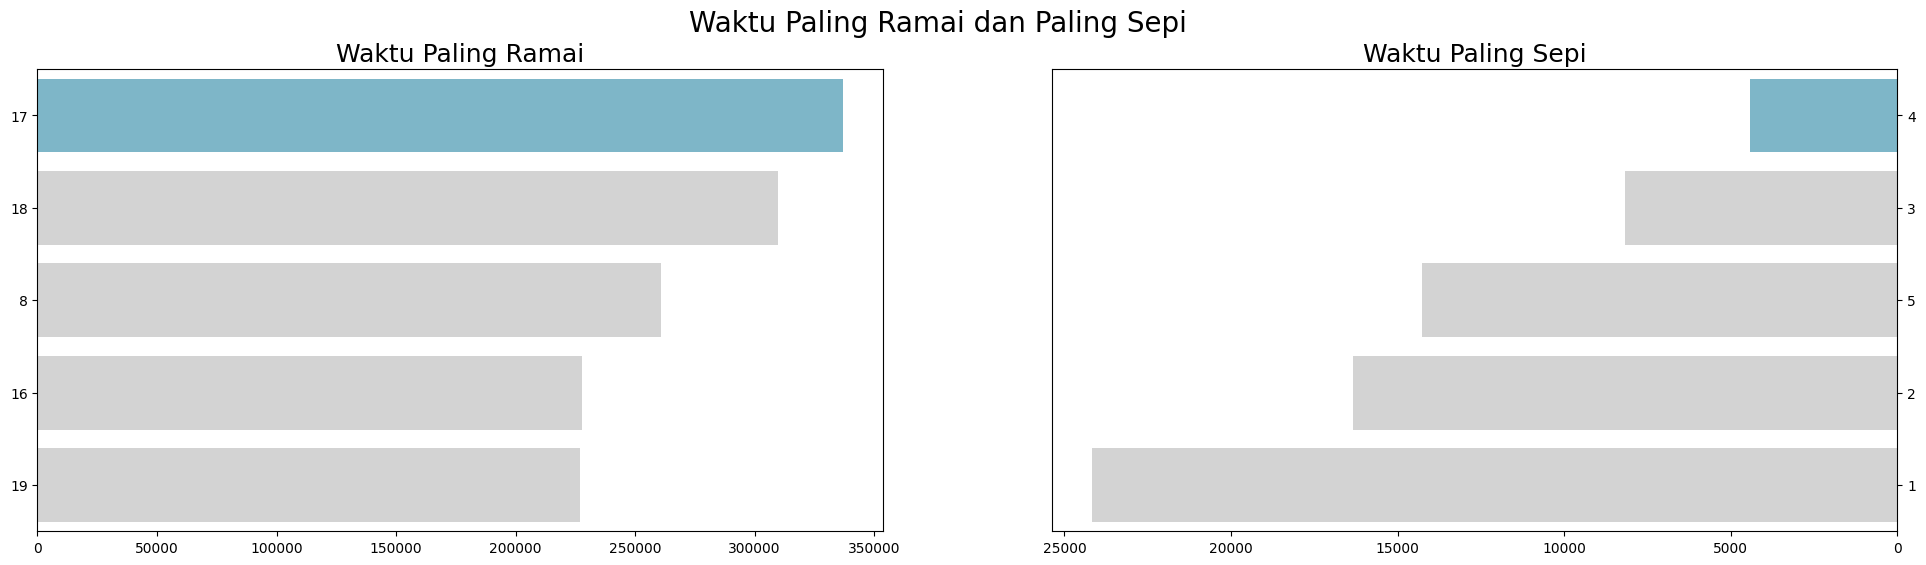

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="cnt", y="hr", data=total_sharing_bike_df, order=total_sharing_bike_df.sort_values(by="cnt", ascending=False).hr.head(5), palette=colors, ax=ax[0], orient="y")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Waktu Paling Ramai", loc="center", fontsize=18)

sns.barplot(x="cnt", y="hr", data=total_sharing_bike_df, order=total_sharing_bike_df.sort_values(by="cnt", ascending=True).hr.head(5), palette=colors, ax=ax[1], orient="y")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Waktu Paling Sepi", loc="center", fontsize=18)

plt.suptitle("Waktu Paling Ramai dan Paling Sepi", fontsize=20)
plt.show()

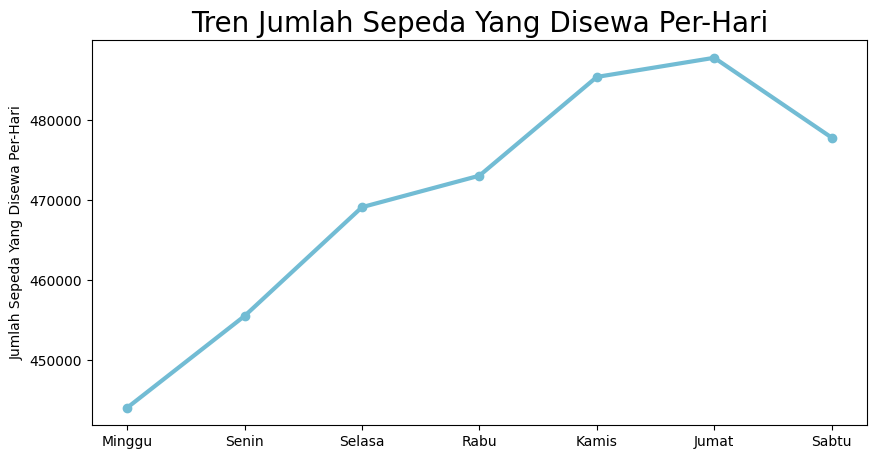

In [ ]:
byday_df = hour_df.groupby(by="weekday").cnt.sum().reset_index()
byday_df.rename(columns={
    "cnt": "count",
}, inplace=True)

byday_df['weekday'] = pd.Categorical(byday_df['weekday'].map({0: 'Minggu',1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}), ordered=True)

plt.figure(figsize=(10, 5))
plt.plot(
    byday_df["weekday"],
    byday_df["count"],
    marker='o',
    linewidth=3,
    color="#72BCD4",
)
plt.title("Tren Jumlah Sepeda Yang Disewa Per-Hari", loc="center", fontsize=20)
plt.ylabel("Jumlah Sepeda Yang Disewa Per-Hari")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

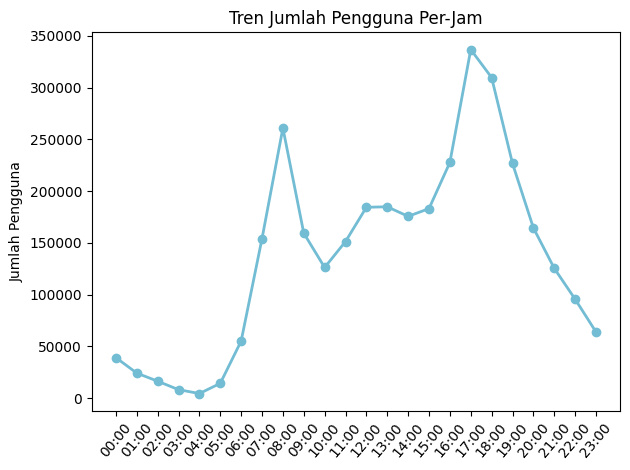

In [ ]:
byhours_df = hour_df.groupby(by="hr").cnt.sum().reset_index()
byhours_df.rename(columns={
    "cnt": "count"
}, inplace=True)

plt.plot(
    byhours_df['hr'],#.unique(),
    byhours_df["count"],
    marker='o',
    markersize=6,
    linewidth=2,
    color="#72BCD4",
)
plt.title("Tren Jumlah Pengguna Per-Jam")
plt.ylabel("Jumlah Pengguna")

plt.xticks(range(24), labels=[f"{i:02d}:00" for i in range(24)], rotation=50)#, ha='right')
plt.tight_layout()
plt.show()

### Pertanyaan 2 : Bagaimana tren jumlah pengguna bike-sharing per-tahunnya?

<ipython-input-26-b28307f1e4ad>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


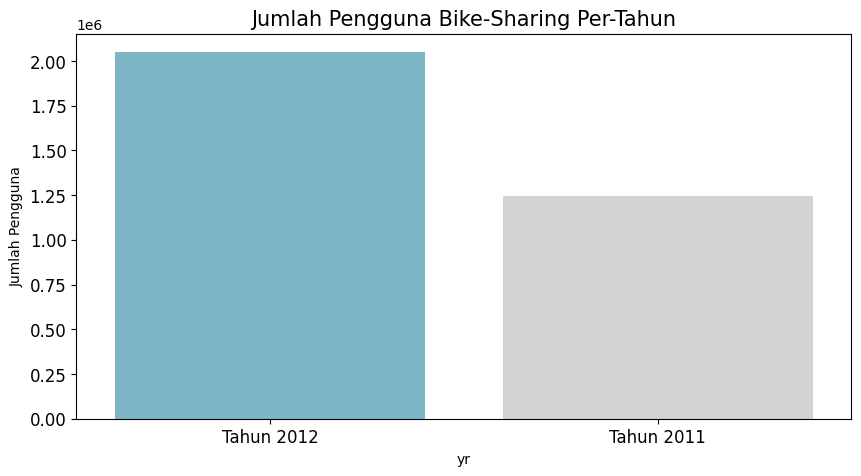

In [ ]:
byyear_df = hour_df.groupby(by="yr").cnt.sum().reset_index()
byyear_df.rename(columns={
    "cnt": "count"
}, inplace=True)

byyear_df['yr'] = pd.Categorical(byyear_df['yr'].map({0: 'Tahun 2011', 1: 'Tahun 2012'}), ordered=True)

plt.figure(figsize=(10, 5))
colors = [ "#72BCD4", "#D3D3D3"]
sns.barplot(
    y="count",
    x="yr",
    data=byyear_df,
    order=byyear_df.sort_values(by="count", ascending=False).yr,
    palette=colors
)
plt.title("Jumlah Pengguna Bike-Sharing Per-Tahun", loc="center", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.tick_params(labelsize=12)
plt.show()

### Pertanyaan 3: Bagaimana pengaruh musim dan cuaca terhadap jumlah pengguna bike-sharing?

<ipython-input-27-b8a940db4808>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-27-b8a940db4808>:10: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


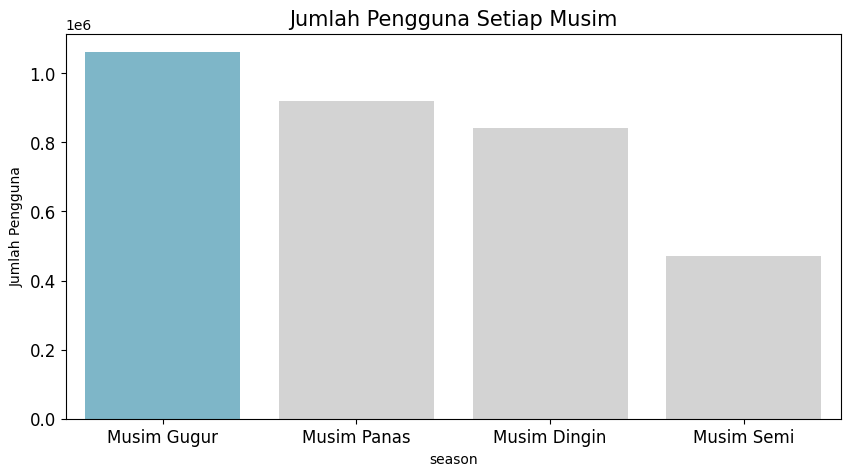

In [ ]:
byseason_df = hour_df.groupby(by="season").cnt.sum().reset_index()
byseason_df.rename(columns={
    "cnt": "count"
}, inplace=True)

byseason_df['season'] = pd.Categorical(byseason_df['season'].map({1: 'Musim Semi',2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}), ordered=True)

plt.figure(figsize=(10, 5))
color=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="count",
    x="season",
    data = byseason_df,
    order = byseason_df.sort_values(by="count", ascending=False).season,
    palette=color
)
plt.title("Jumlah Pengguna Setiap Musim", loc="center", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.tick_params(labelsize=12)
plt.show()

<ipython-input-28-2972f04111b7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


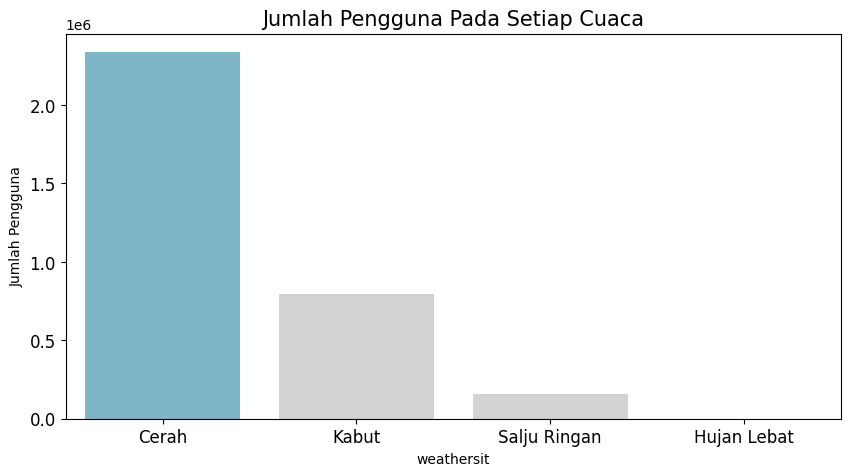

In [ ]:
byweather_df = hour_df.groupby(by="weathersit").cnt.sum().reset_index()
byweather_df.rename(columns={
    "cnt": "count"
}, inplace=True)

byweather_df['weathersit'] = pd.Categorical(byweather_df['weathersit'].map({1: 'Cerah',2: 'Kabut', 3: 'Salju Ringan', 4: 'Hujan Lebat'}), ordered=True)

colors=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="weathersit",
    data = byweather_df,
    order = byweather_df.sort_values(by="count", ascending=False).weathersit,
    palette=colors
)
plt.title("Jumlah Pengguna Pada Setiap Cuaca", loc="center", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.tick_params(labelsize=12)
plt.show()

### Pertanyaan 4: Bagaimana pengaruh weekend/holiday terhadap jumlah pengguna bike-sharing?

<ipython-input-29-9b352cc69f9f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


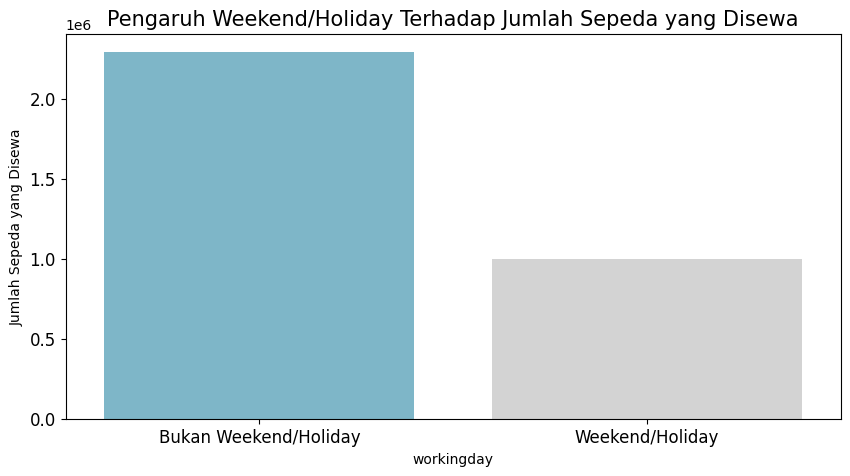

In [ ]:
byworkingday_df = hour_df.groupby(by="workingday").cnt.sum().reset_index()
byworkingday_df.rename(columns={
    "cnt": "count"
}, inplace=True)

byworkingday_df['workingday'] = pd.Categorical(byworkingday_df['workingday'].map({0: 'Weekend/Holiday', 1: 'Bukan Weekend/Holiday'}), ordered=True)

plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3"]
sns.barplot(
    y="count",
    x="workingday",
    data=byworkingday_df,
    order=byworkingday_df.sort_values(by="count", ascending=False).workingday,
    palette=colors
)
plt.title("Pengaruh Weekend/Holiday Terhadap Jumlah Sepeda yang Disewa", loc="center", fontsize=15)
plt.ylabel("Jumlah Sepeda yang Disewa")
plt.tick_params(labelsize=12)
plt.show()

**RFM ANALYSIS**

In [ ]:
import datetime as dt

In [ ]:
rfm_df = hour_df.groupby(by="instant", as_index=False).agg({
    "dteday": ["max","nunique"], #mengambil tanggal order terakhir
    "cnt": "sum"
})
rfm_df.columns = ["instant", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,instant,max_order_timestamp,frequency,monetary
0,1,2011-01-01,1,16
1,2,2011-01-01,1,40
2,3,2011-01-01,1,32
3,4,2011-01-01,1,13
4,5,2011-01-01,1,1


In [ ]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = hour_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,instant,max_order_timestamp,frequency,monetary,recency
0,1,2011-01-01,1,16,730
1,2,2011-01-01,1,40,730
2,3,2011-01-01,1,32,730
3,4,2011-01-01,1,13,730
4,5,2011-01-01,1,1,730


In [ ]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,instant,frequency,monetary,recency
0,1,1,16,730
1,2,1,40,730
2,3,1,32,730
3,4,1,13,730
4,5,1,1,730


In [ ]:
rfm_df.describe()

,instant,frequency,monetary,recency
count,17379.0000,17379.0,17379.000000,17379.000000
mean,8690.0000,1.0,189.463088,363.827378
std,5017.0295,0.0,181.387599,210.072051
min,1.0000,1.0,1.000000,0.000000
25%,4345.5000,1.0,40.000000,182.000000
50%,8690.0000,1.0,142.000000,364.000000
75%,13034.5000,1.0,281.000000,546.000000
max,17379.0000,1.0,977.000000,730.000000


In [ ]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,instant,frequency,monetary,recency
17378,17379,1,49,0
17355,17356,1,34,0
17356,17357,1,19,0
17357,17358,1,11,0
17358,17359,1,1,0


In [ ]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,instant,frequency,monetary,recency
0,1,1,16,730
11591,11592,1,2,242
11577,11578,1,240,243
11578,11579,1,256,243
11579,11580,1,367,243


<ipython-input-37-203a05ef2353>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-37-203a05ef2353>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-37-203a05ef2353>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="instant", data=rfm_df.sort_values(by="monetary", a

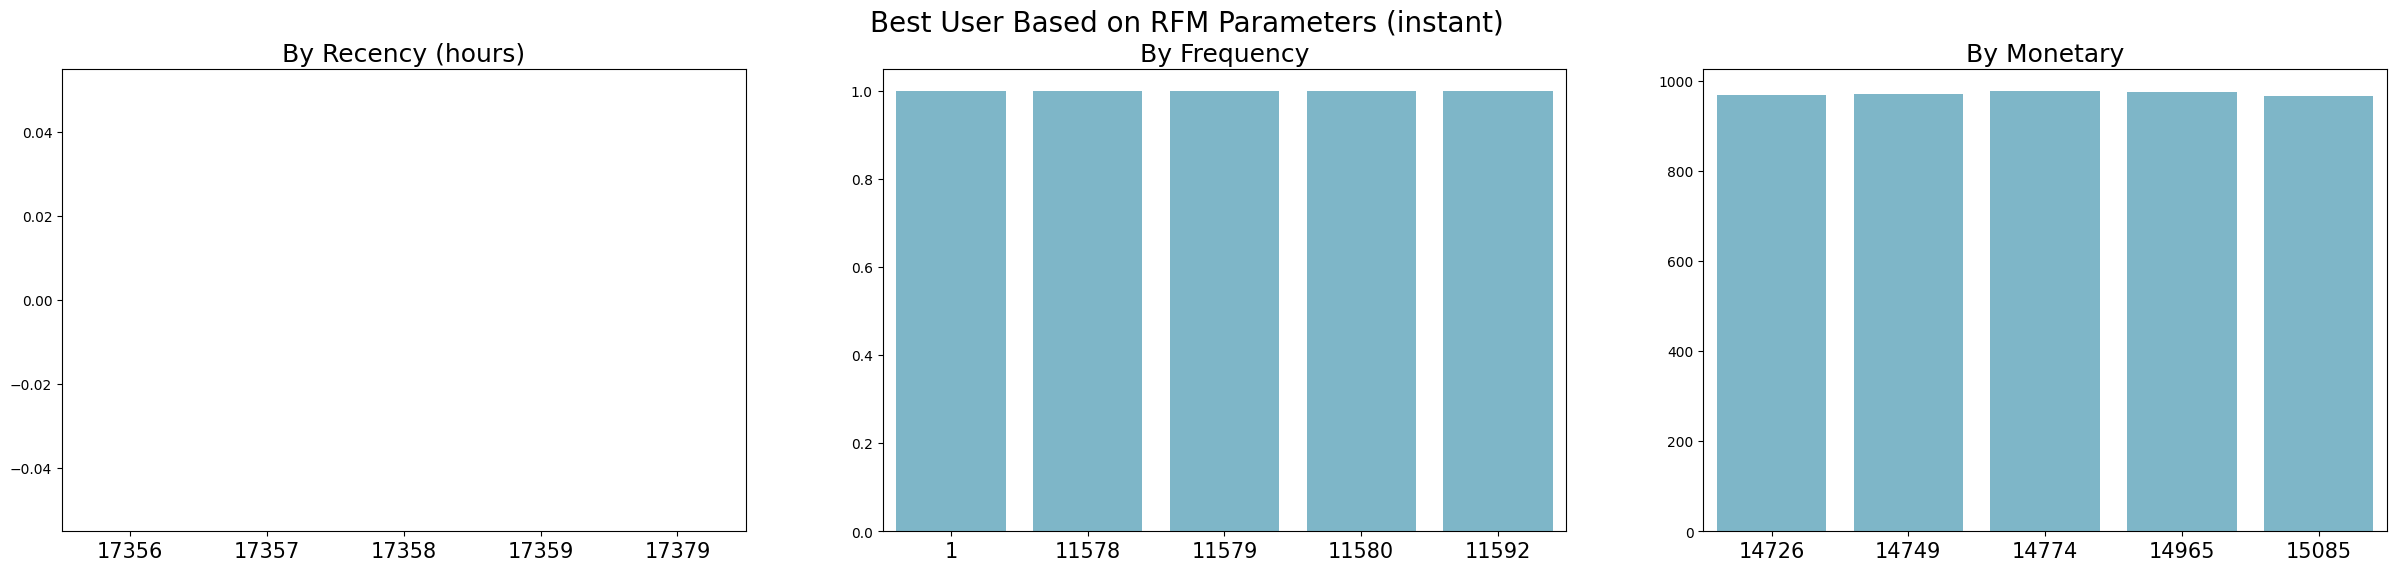

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (hours)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="instant", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best User Based on RFM Parameters (instant)", fontsize=20)
plt.show()

**MENGURUTKAN CUSTOMER BERDASARKAN RECENCY, FREQUENCY & MONETARY SCORE**

In [ ]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,instant,frequency,monetary,recency,r_rank,f_rank,m_rank
0,1,1,16,730,12.5,8690.0,2601.0
1,2,1,40,730,12.5,8690.0,4348.5
2,3,1,32,730,12.5,8690.0,3863.5
3,4,1,13,730,12.5,8690.0,2306.0
4,5,1,1,730,12.5,8690.0,79.5


In [ ]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,instant,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,1,1,16,730,0.071974,100.0,14.966339
1,2,1,40,730,0.071974,100.0,25.021578
2,3,1,32,730,0.071974,100.0,22.230853
3,4,1,13,730,0.071974,100.0,13.268888
4,5,1,1,730,0.071974,100.0,0.457449


In [ ]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['instant', 'RFM_score']].head(7)

,instant,RFM_score
0,1,1.83
1,2,2.11
2,3,2.03
3,4,1.78
4,5,1.41
5,6,1.41
6,7,1.44


**SEGMENTASI CUSTOMER BERDASARKAN RFM_SCORE**

In [ ]:
rfm_df["user_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top user", (np.where(
        rfm_df['RFM_score'] > 4, "High value user",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value user", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value user', 'lost user'))))))

rfm_df[['instant', 'RFM_score', 'user_segment']].head(20)

,instant,RFM_score,user_segment
0,1,1.83,Low value user
1,2,2.11,Low value user
2,3,2.03,Low value user
3,4,1.78,Low value user
4,5,1.41,lost user
5,6,1.41,lost user
6,7,1.44,lost user
7,8,1.48,lost user
8,9,1.66,Low value user
9,10,1.80,Low value user


In [ ]:
user_segment_df = rfm_df.groupby(by="user_segment", as_index=False).instant.nunique()
user_segment_df

,user_segment,instant
0,High value user,2549
1,Low value user,7470
2,Medium value user,5504
3,Top user,1548
4,lost user,308


In [ ]:
user_segment_df['user_segment'] = pd.Categorical(user_segment_df['user_segment'], [
    "lost user", "Low value user", "Medium value user",
    "High value user", "Top user"
])

<ipython-input-44-40476bdd298a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


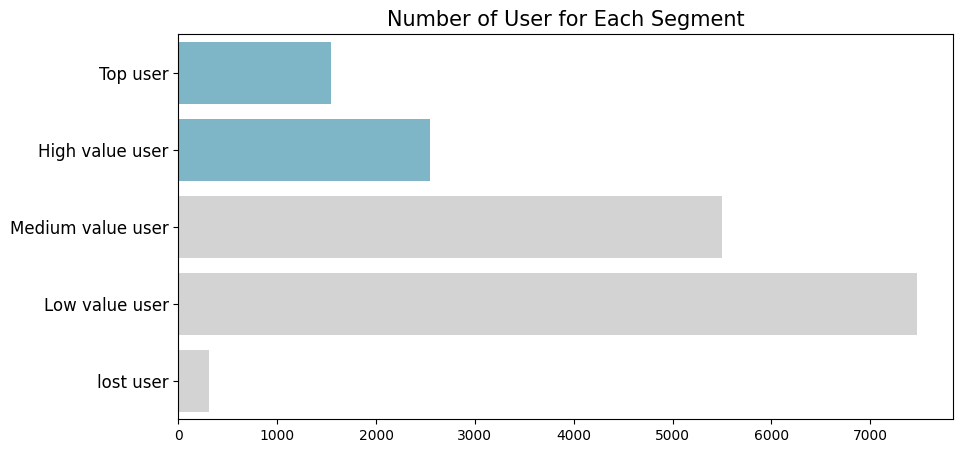

In [ ]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="instant",
    y="user_segment",
    data=user_segment_df,
    order=user_segment_df.sort_values(by="user_segment", ascending=False).user_segment,
    palette=colors_
)
plt.title("Number of User for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()


## Conclusion

- Menjelang akhir pekan yaitu pada hari Kamis, Jumat dan Sabtu pada jam 17.00-18.00 terjadi kenaikan jumlah pengguna bike-sharing dibandingkan hari-hari dan jam-jam yang lainnya.
- Terjadi kenaikan jumlah pengguna bike-sharing yang cukup signifikan dari tahun 2011 ke tahun 2012 yaitu sekitar 1 juta pengguna
- Mayoritas pengguna bike-sharing melakukan penyewaan sepeda pada musim gugur, ketika cuaca sedang cerah, sedikit awan ataupun berawan sebagian.
- Mayoritas pengguna bike-sharing melakukan penyewaan ketika hari kerja dan bukan hari libur

In [ ]:
day_df.to_csv("data_day.csv", index=False)

In [ ]:
hour_df.to_csv("data_hours.csv", index=False)

In [ ]:
#!pip freeze > requirements.txt